In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adults/adult.data


In [42]:
df = pd.read_csv("/kaggle/input/adults/adult.data",
                names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race",
                        "sex","capital-gain","capital-loss","hours-per-week","native-country","class"])

In [43]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [44]:
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='class'>

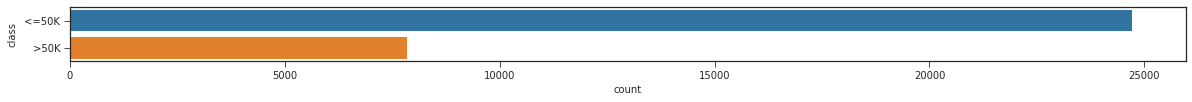

In [45]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y='class', data=df)

In [46]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [47]:
drop_element = ['class']
y=df['class']
x=df.drop(drop_element,axis=1)
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb 
import lightgbm as lgb 
import catboost as cat 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error
from tqdm.notebook import tqdm

In [78]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

names=[
#     'Decision Tree',
#     'KNN',
#     'RandomForest',
    'AdaBoost',
    'XGB',
    'LGBM',
    'CatBoost'
]

models = [
#     DecisionTreeClassifier(),
#     KNeighborsClassifier(),
#     RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    xgb.XGBClassifier(n_estimators=100),
    lgb.LGBMClassifier(n_estimators=100),
    cat.CatBoostClassifier(n_estimators=100, verbose=0),
]

def scoring_f1(X_train, X_valid, Y_train, Y_valid, model,name) :
    model.fit(X_train, Y_train)
    preds = model.predict(X_valid)
    score = model.score(X_valid, y_valid)
    f1score = f1_score(Y_valid, preds)
    string = str(name)+":"+str(score)
    f1_string = str(name)+":"+str(f1score)
    return f1_string, string

# f1_list=[]
# acc_list = []

# for i in tqdm(range(len(models))):
#     f1, acc =  scoring_f1(x_train, x_valid, y_train, y_valid, models[i],names[i])
#     f1_list.append(f1)
#     acc_list.append(acc)

In [79]:
print("For f1 score:")
for result in f1_list:
    print(result)
print("For accuracy ")
for result in acc_list:
    print(result)

For f1 score:
For accuracy 


**做 feature selection**

<AxesSubplot:>

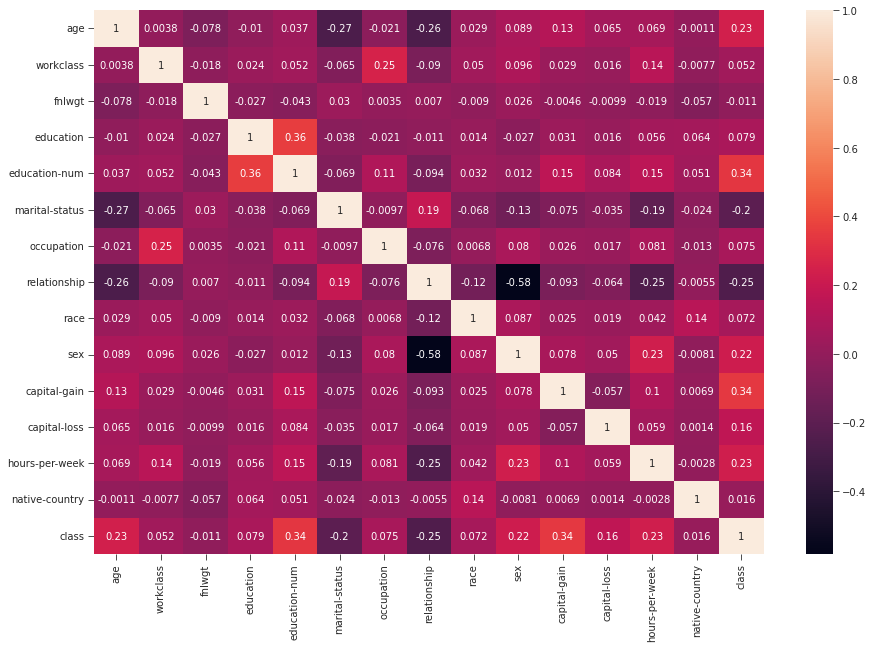

In [80]:
CorrMat = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(CorrMat, annot = True)

**By correlation**

In [81]:
vals = [0,0.05,0.1,0.2,0.3]
for val in vals:
    features = abs(CorrMat["class"][abs(CorrMat["class"])>val].drop('class')).index.tolist()
    
    X = df.drop(columns='class')
    X = X[features]
    
    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

    f1_list=[]
    acc_list = []

    for i in tqdm(range(len(models))):
        f1, acc =  scoring_f1(x_train, x_valid, y_train, y_valid, models[i],names[i])
        f1_list.append(f1)
        acc_list.append(acc)
    print("\n"+str(features)+"\n")
    print("For f1 score:")
    for result in f1_list:
        print(result)
    print("For accuracy ")
    for result in acc_list:
        print(result)

  0%|          | 0/4 [00:00<?, ?it/s]


['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

For f1 score:
AdaBoost:0.6943521594684385
XGB:0.7077772664519097
LGBM:0.7176279823951819
CatBoost:0.7079357691412614
For accuracy 
AdaBoost:0.8681543658511618
XGB:0.8699969290613164
LGBM:0.8752175248234211
CatBoost:0.8715323984031119


  0%|          | 0/4 [00:00<?, ?it/s]


['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

For f1 score:
AdaBoost:0.6877849772018239
XGB:0.7104477611940299
LGBM:0.7128300138953221
CatBoost:0.7105816398037841
For accuracy 
AdaBoost:0.8668236257549391
XGB:0.8709182106663937
LGBM:0.8730678677449074
CatBoost:0.8731702323676938


  0%|          | 0/4 [00:00<?, ?it/s]


['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

For f1 score:
AdaBoost:0.6655172413793103
XGB:0.6863625620420704
LGBM:0.6795366795366795
CatBoost:0.6765853658536586
For accuracy 
AdaBoost:0.8609888422561163
XGB:0.8641621455624936
LGBM:0.8640597809397073
CatBoost:0.8642645101852799


  0%|          | 0/4 [00:00<?, ?it/s]


['age', 'education-num', 'relationship', 'sex', 'capital-gain', 'hours-per-week']

For f1 score:
AdaBoost:0.648862512363996
XGB:0.6545454545454544
LGBM:0.6592824464242716
CatBoost:0.6561207106351911
For accuracy 
AdaBoost:0.8546422356433616
XGB:0.8521854846964889
LGBM:0.8551540587572934
CatBoost:0.8553587880028662


  0%|          | 0/4 [00:00<?, ?it/s]


['education-num', 'capital-gain']

For f1 score:
AdaBoost:0.4204657264676943
XGB:0.49683726279470963
LGBM:0.4951121334100057
CatBoost:0.4974152785755313
For accuracy 
AdaBoost:0.8191217115364929
XGB:0.8208619101238612
LGBM:0.820247722387143
CatBoost:0.8208619101238612


**單變量特徵選取 Univariate Selection**

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

In [72]:
for ii in range(x.shape[1]):    

    chi2_selector = SelectKBest(f_classif,k = ii+1)
    kBest = chi2_selector.fit_transform(x,y)
    x_train, x_valid, y_train, y_valid = train_test_split(kBest, y, test_size=0.3, random_state=42)
    
    selectedFeatureIndices = chi2_selector.get_support(indices=True)
    selectedFeatureColNames = x.columns[selectedFeatureIndices]

    f1_list=[]
    acc_list = []

    for i in tqdm(range(len(models))):
        f1, acc =  scoring_f1(x_train, x_valid, y_train, y_valid, models[i],names[i])
        f1_list.append(f1)
        acc_list.append(acc)
        
        
    print(f"Selected feature list:\n{selectedFeatureColNames}")
    print("For f1 score:")
    for result in f1_list:
        print(result)
    print("For accuracy ")
    for result in acc_list:
        print(result)

  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['capital-gain'], dtype='object')
For f1 score:
Decision Tree:0.3497345132743363
KNN:0.3580508474576271
RandomForest:0.35754583921015515
AdaBoost:0.35767195767195764
For accuracy 
Decision Tree:0.8119561879414474
KNN:0.8139011157743884
RandomForest:0.8134916572832429
AdaBoost:0.8135940219060293


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['education-num', 'capital-gain'], dtype='object')
For f1 score:
Decision Tree:0.4204657264676943
KNN:0.49683726279470963
RandomForest:0.4951121334100057
AdaBoost:0.4974152785755313
For accuracy 
Decision Tree:0.8191217115364929
KNN:0.8208619101238612
RandomForest:0.820247722387143
AdaBoost:0.8208619101238612


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['education-num', 'relationship', 'capital-gain'], dtype='object')
For f1 score:
Decision Tree:0.6221776216758654
KNN:0.6228921819110883
RandomForest:0.6227330779054918
AdaBoost:0.6227330779054918
For accuracy 
Decision Tree:0.8458388780837343
KNN:0.8489098167673252
RandomForest:0.8488074521445389
AdaBoost:0.8488074521445389


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education-num', 'relationship', 'capital-gain'], dtype='object')
For f1 score:
Decision Tree:0.6196965800977116
KNN:0.6397822859970311
RandomForest:0.6455758774097874
AdaBoost:0.6476096599310005
For accuracy 
Decision Tree:0.8486027228989661
KNN:0.8509571092230526
RandomForest:0.8532091309243526
AdaBoost:0.853618589415498


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education-num', 'relationship', 'capital-gain',
       'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.6478314745972739
KNN:0.6501085121774777
RandomForest:0.6586248492159228
AdaBoost:0.6561895551257252
For accuracy 
Decision Tree:0.8545398710205753
KNN:0.8514689323369843
RandomForest:0.8551540587572934
AdaBoost:0.8544375063977889


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education-num', 'relationship', 'sex', 'capital-gain',
       'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.648862512363996
KNN:0.6545454545454544
RandomForest:0.6592824464242716
AdaBoost:0.6561207106351911
For accuracy 
Decision Tree:0.8546422356433616
KNN:0.8521854846964889
RandomForest:0.8551540587572934
AdaBoost:0.8553587880028662


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education-num', 'marital-status', 'relationship', 'sex',
       'capital-gain', 'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.6469565217391304
KNN:0.6548211324330727
RandomForest:0.6610978520286396
AdaBoost:0.6576728499156831
For accuracy 
Decision Tree:0.8545398710205753
KNN:0.8508547446002661
RandomForest:0.8546422356433616
AdaBoost:0.8545398710205753


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education-num', 'marital-status', 'relationship', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.6655172413793103
KNN:0.6863625620420704
RandomForest:0.6795366795366795
AdaBoost:0.6765853658536586
For accuracy 
Decision Tree:0.8609888422561163
KNN:0.8641621455624936
RandomForest:0.8640597809397073
AdaBoost:0.8642645101852799


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education', 'education-num', 'marital-status', 'relationship',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.6733058051979597
KNN:0.6783514921837991
RandomForest:0.6848137535816619
AdaBoost:0.6827154549831488
For accuracy 
Decision Tree:0.8623195823523391
KNN:0.8609888422561163
RandomForest:0.8648786979219981
AdaBoost:0.8650834271675709


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education', 'education-num', 'marital-status', 'occupation',
       'relationship', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.6894409937888198
KNN:0.7025652877282182
RandomForest:0.7062369580338511
AdaBoost:0.7011521279097108
For accuracy 
Decision Tree:0.8669259903777254
KNN:0.8682567304739482
RandomForest:0.8703040229296755
AdaBoost:0.8698945644385301


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'education', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.6896716990174934
KNN:0.7016166281755196
RandomForest:0.7099767981438515
AdaBoost:0.7014750643877312
For accuracy 
Decision Tree:0.8674378134916573
KNN:0.8677449073600164
RandomForest:0.8720442215170437
AdaBoost:0.8694851059473846


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')
For f1 score:
Decision Tree:0.6877849772018239
KNN:0.7104477611940299
RandomForest:0.7128300138953221
AdaBoost:0.7105816398037841
For accuracy 
Decision Tree:0.8668236257549391
KNN:0.8709182106663937
RandomForest:0.8730678677449074
AdaBoost:0.8731702323676938


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
For f1 score:
Decision Tree:0.6918687589158345
KNN:0.710367271036727
RandomForest:0.7146827234830939
AdaBoost:0.7057723767235337
For accuracy 
Decision Tree:0.8673354488688709
KNN:0.8724536800081891
RandomForest:0.8738867847271983
AdaBoost:0.8711229399119664


  0%|          | 0/4 [00:00<?, ?it/s]

Selected feature list:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
For f1 score:
Decision Tree:0.6943521594684385
KNN:0.7077772664519097
RandomForest:0.7176279823951819
AdaBoost:0.7079357691412614
For accuracy 
Decision Tree:0.8681543658511618
KNN:0.8699969290613164
RandomForest:0.8752175248234211
AdaBoost:0.8715323984031119


**包裝方法 Wrapper Method**

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

f1_list=[]
acc_list = []

for k in range(14):
    for i in tqdm(range(len(models))):
        
        rfe = RFE((models[i],k+1,step=1)
        rfe = rfe.fit(X_train, y_train)
        preds = rfe.predict(X_valid)
        score = rfe.score(X_valid, y_valid)
        f1score = f1_score(y_valid, preds)

        string = str(name)+":"+str(score)
        f1_string = str(name)+":"+str(f1score)
        f1_list.append(f1_string)
        acc_list.append(string)

    feature_names = X.columns[rfe.get_support()]

    print(f"Selected feature list:\n{feature_names}")
    print("For f1 score:")
    for result in f1_list:
        print(result)
    print("For accuracy ")
    for result in acc_list:
        print(result)

SyntaxError: invalid syntax (4010501696.py, line 12)